# Data Analysis of Marketing Campaigns and Adviser Performance

## Introduction

In this analysis, we aim to explore the performance of marketing campaigns and call centre advisers. We will start by cleaning and preparing the data from both campaigns and advisers. Although there is no explicit linkage between campaigns and advisers in the data provided, we will attempt to infer relationships using aggregate data and make informed assumptions to analyze how marketing efforts translate into customer conversions through adviser performance.



## Table of Contents
1. [Data Preprocessing and Cleaning](#1-data-preprocessing-and-cleaning)
   - 1.1 [Import Necessary Libraries](#11-import-necessary-libraries)
   - 1.2 [Load the Data](#12-load-the-data)
   - 1.3 [Data Inspection](#13-data-inspection)
   - 1.4 [Data Cleaning](#14-data-cleaning)
   - 1.5 [Handle Missing Values](#15-handle-missing-values)
2. [Descriptive Statistics and Exploratory Data Analysis (EDA)](#2-descriptive-statistics-and-exploratory-data-analysis-eda)
   - 2.1 [Summary Statistics](#21-summary-statistics)
   - 2.2 [Correlation Analysis](#22-correlation-analysis)
   - 2.3 [Distribution Analysis](#23-distribution-analysis)
3. [Attempting to Link Campaigns and Advisers](#3-attempting-to-link-campaigns-and-advisers)
   - 3.1 [Acknowledge Data Limitations](#31-acknowledge-data-limitations)
   - 3.2 [Aggregate Data by Total Applications](#32-aggregate-data-by-total-applications)
   - 3.3 [Correlation Analysis Between Campaigns and Advisers](#33-correlation-analysis-between-campaigns-and-advisers)
4. [Conversion Funnel Analysis](#4-conversion-funnel-analysis)
   - 4.1 [Calculate Conversion Rates](#41-calculate-conversion-rates)
   - 4.2 [Visualize the Funnel](#42-visualize-the-funnel)
5. [Revenue and ROI Calculations](#5-revenue-and-roi-calculations)
6. [Campaign and Adviser Performance Segmentation](#6-campaign-and-adviser-performance-segmentation)
   - 6.1 [Identify Top Performers](#61-identify-top-performers)
   - 6.2 [Cluster Analysis](#62-cluster-analysis)
7. [Predictive Modeling](#7-predictive-modeling)
   - 7.1 [Prepare Data](#71-prepare-data)
   - 7.2 [Build and Evaluate Models](#72-build-and-evaluate-models)
8. [Recommendations](#8-recommendations)



# 1. Data preprocessing and cleaning

## Purpose

Before we can analyze the data, we need to make sure it's clean and in a usable format. This involves correcting any errors, converting data types, and handling missing values.

## What We're Doing
- **Importing necessary libraries**: Tools that help us analyze data.
- **Loading the data**: Bringing in the data so we can work with it.
- **Cleaning the data**: Fixing any issues to ensure accuracy.

## Code and Explanation


### 1.1 Import Necessary Libraries
These are like tools in a toolbox. Each library helps us perform different tasks.

In [67]:
import pandas as pd       # For data manipulation
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns     # For making prettier plots


from scipy import stats # For statistical tests

# For clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import optuna

# Allows us to display plots within the notebook
%matplotlib inline


### 1.2 Load the data
We load the data from the Excel file, which contains two sheets: 'Table1' for campaigns data and 'Table2' for advisers data.

In [2]:
# Load the data from the Excel file
df_campaigns = pd.read_excel('Analysis Test_November2024.xlsx', sheet_name='Table 1')
df_advisers = pd.read_excel('Analysis Test_November2024.xlsx', sheet_name='Table 2')

### 1.3 Data Inspection
Let's look at the data to see what's inside.

In [3]:
# Inspect campaigns data
print(df_campaigns.head())
print(df_campaigns.info())
# Check for missing values
print(df_campaigns.isnull().sum())

# Inspect advisers data
print(df_advisers.head())
print(df_advisers.info())
# Check for missing values
print(df_advisers.isnull().sum())

     Campaign  Applications generated  Applications interested  \
0  Campaign 1                    7865                     2276   
1  Campaign 2                    5659                     1981   
2  Campaign 3                    2384                     1361   
3  Campaign 4                    4439                      818   
4  Campaign 5                     995                      390   

   Customers converted  Average value of Customers  Marketing Spend  
0                  8.9                        5110         13217.92  
1                  8.9                        6430         12232.42  
2                  6.0                        7803         10592.21  
3                 10.7                        5436          9837.83  
4                  4.4                        4371          9448.46  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------           

### 1.4 Data Cleaning
We need to fix any issues in the data.

Remove Whitespace and Currency Symbols

### Clean Campaigns Data

In [8]:
# Strip whitespace from column names
df_campaigns.columns = df_campaigns.columns.str.strip()

# Define monetary columns
monetary_cols = ['Average value of Customers', 'Marketing Spend']

# Clean and convert monetary columns
for col in monetary_cols:
    df_campaigns[col] = df_campaigns[col].astype(str).str.replace('€', '').str.replace(',', '').str.strip()
    df_campaigns[col] = df_campaigns[col].replace(['-', ''], '0')  # Replace missing or placeholder values with 0
    df_campaigns[col] = pd.to_numeric(df_campaigns[col], errors='coerce')
    
    
# Convert other numerical columns to numeric types
numeric_cols = ['Applications generated', 'Applications interested', 'Customers converted']
df_campaigns[numeric_cols] = df_campaigns[numeric_cols].apply(pd.to_numeric, errors='coerce')    

### Clean Advisers Data

In [ ]:
# Clean column names
df_advisers.columns = df_advisers.columns.str.strip()

# Convert numerical columns
numeric_cols_advisers = ['Applications received', 'Applications converted to customers']
df_advisers[numeric_cols_advisers] = df_advisers[numeric_cols_advisers].apply(pd.to_numeric, errors='coerce')

### Explanation:

- **Removing symbols**: We remove the euro symbol (€) and commas to convert the monetary values into numbers.
- **Handling missing values**: Some entries might be missing (e.g., represented by '-'). We replace these with 0.
- **Converting to numbers**: We make sure the data is in a numeric format so we can perform calculations.

### 1.5 Handle Missing Values
### Campaigns Data

In [12]:
# Check for any remaining missing values
print(df_campaigns.isnull().sum())

# Drop rows with missing values
df_campaigns.dropna(inplace=True)

# Reset the index after dropping rows
df_campaigns.reset_index(drop=True, inplace=True)


Campaign                      0
Applications generated        0
Applications interested       0
Customers converted           0
Average value of Customers    0
Marketing Spend               0
dtype: int64


### Advisers Data

In [11]:
# Check for missing values
print(df_advisers.isnull().sum())

# Drop rows with missing values if any
df_advisers.dropna(inplace=True)
df_advisers.reset_index(drop=True, inplace=True)


Call Centre                            0
Adviser                                0
Applications received                  0
Applications converted to customers    0
dtype: int64


### Verify cleaned data

In [14]:
# Verify data types
print(df_campaigns.dtypes)

print(df_advisers.dtypes)

Campaign                       object
Applications generated          int64
Applications interested         int64
Customers converted           float64
Average value of Customers      int64
Marketing Spend               float64
dtype: object
Call Centre                            object
Adviser                                object
Applications received                   int64
Applications converted to customers     int64
dtype: object


### Summary of Step 1
- We've cleaned the data so it's ready for analysis.
- All monetary values are numeric.
- There are no missing values in the dataset.

# 2. Descriptive Statistics and Exploratory Data Analysis (EDA)

## Purpose
Now that the data is clean, we'll explore it to understand general patterns and statistics.

## What We're Doing
- Calculating summary statistics: Finding averages, totals, etc.
- Visualizing data distributions: Seeing how data is spread out.

## Code and Explanation
### 2.1 Summary Statistics

### Campaigns Data

In [17]:
# Get summary statistics for numerical columns
df_campaigns.describe()

,Applications generated,Applications interested,Customers converted,Average value of Customers,Marketing Spend
count,376.000000,376.000000,376.000000,376.000000,376.000000
mean,281.468085,102.018617,1.163298,2374.077128,889.594299
std,735.377276,246.497247,2.327203,3019.391500,1606.414140
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,5.750000,0.000000,0.000000,98.462500
50%,43.000000,18.500000,0.100000,0.000000,283.355000
75%,194.000000,80.500000,1.100000,5563.250000,1045.550000
max,7865.000000,2276.000000,18.700000,7981.000000,13217.920000


### Advisers Data

In [18]:
df_advisers.describe()

,Applications received,Applications converted to customers
count,361.000000,361.000000
mean,10369.581717,54.296399
std,10998.414653,68.771305
min,101.000000,0.000000
25%,2893.000000,6.000000
50%,7219.000000,26.000000
75%,14502.000000,77.000000
max,68074.000000,398.000000


### Explanation:

- This provides information like mean (average), standard deviation (how spread out the data is), and counts for each numerical column.

### What We Learn:

The summary statistics provide insights into the general characteristics of both campaigns and adviser data.

- For **campaigns data**, the average number of applications generated is 281, while the average marketing spend is approximately €889. The high standard deviation for several columns, such as "Applications generated" and "Marketing Spend," indicates substantial variability among different campaigns. This variability suggests that some campaigns are far more successful than others in generating interest and converting customers.

- For **adviser data**, the average number of applications received is 10,369, while the average number of applications converted to customers is around 54. However, the high standard deviation in "Applications received" and "Applications converted to customers" reveals considerable differences in adviser performance. Some advisers receive significantly more applications than others, which could affect their overall conversion rates. Additionally, the high variability could indicate differences in how advisers are assigned or manage their workload.

Overall, these observations highlight potential disparities in both campaigns' effectiveness and advisers' performance, which may warrant further investigation to optimize future marketing efforts and adviser training.


### 2.2 Correlation Matrix

### Campaigns Data

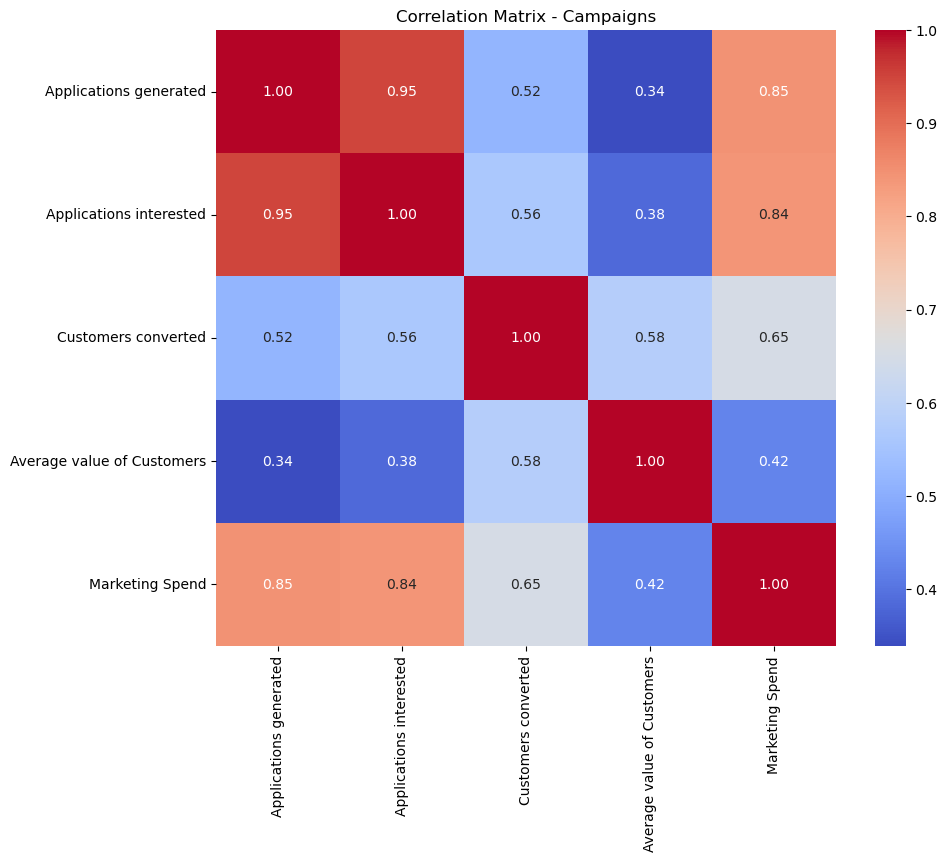

In [19]:
# Correlation matrix for campaigns
corr_matrix_campaigns = df_campaigns.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_campaigns, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Campaigns')
plt.show()

### Advisers Data

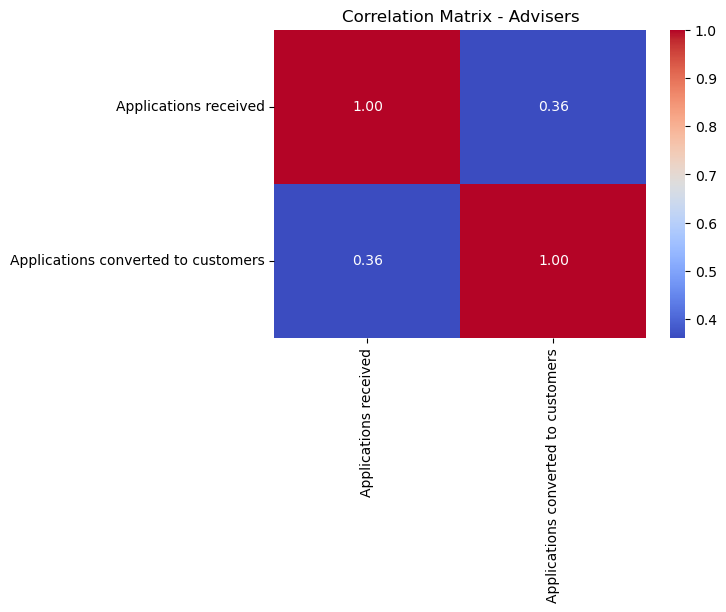

In [20]:
# Correlation matrix for advisers
corr_matrix_advisers = df_advisers.select_dtypes(include='number').corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix_advisers, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Advisers')
plt.show()

### Explanation:

- **Correlation matrix**: Shows how closely related different variables are.
- **Heatmap**: A visual representation where colors indicate the strength of the relationship.

### What We Learn:

The correlation matrix revealed key relationships between variables for both campaigns and advisers data:

- For **campaigns data**, there is a strong positive correlation between "Applications Generated" and "Applications Interested" (0.95), suggesting that generating more applications effectively leads to more interested customers. Additionally, "Marketing Spend" has a moderate correlation with "Customers Converted" (0.65), indicating that higher spending generally leads to more customers, though other factors also contribute to conversion success.

- For **adviser data**, the correlation between "Applications Received" and "Applications Converted to Customers" is relatively low (0.36). This suggests that receiving more applications does not necessarily result in higher customer conversions, highlighting variability in advisers' effectiveness in converting leads.

Overall, these insights help in understanding the relationships between marketing activities and customer conversions, as well as the efficiency of advisers. Marketing spend shows some impact on customer conversion, and variability in adviser performance suggests areas for targeted improvement.


### 2.3 Distribution Analysis

### Campaigns Data

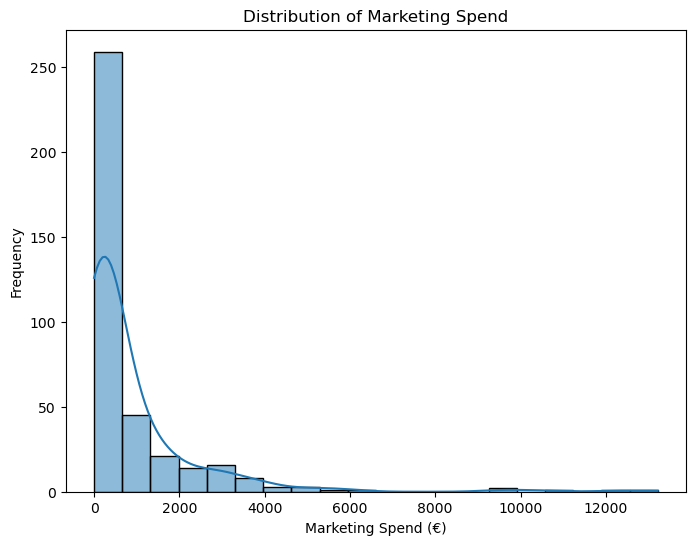

In [22]:
# Histogram of Marketing Spend
plt.figure(figsize=(8, 6))
sns.histplot(df_campaigns['Marketing Spend'], bins=20, kde=True)
plt.title('Distribution of Marketing Spend')
plt.xlabel('Marketing Spend (€)')
plt.ylabel('Frequency')
plt.show()

### Campaigns Data

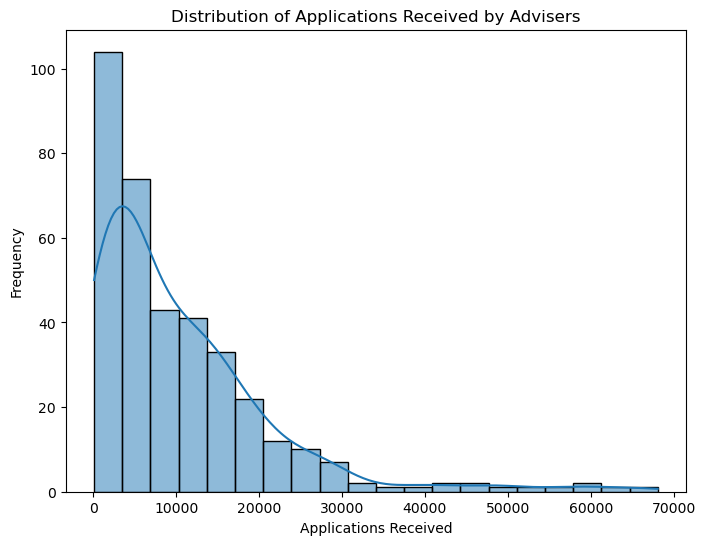

In [23]:
# Histogram of Applications Received
plt.figure(figsize=(8, 6))
sns.histplot(df_advisers['Applications received'], bins=20, kde=True)
plt.title('Distribution of Applications Received by Advisers')
plt.xlabel('Applications Received')
plt.ylabel('Frequency')
plt.show()


### What We Learn:

The histograms showed key patterns in both marketing spend and applications received:

- For **campaigns data**, most campaigns had a relatively low marketing spend, with a peak at the lower end of the distribution. This indicates that the majority of campaigns are operating on limited budgets, suggesting an opportunity to reallocate funds to higher-potential campaigns. Only a few campaigns have significant marketing investments, which may contribute disproportionately to customer conversions.

- For **adviser data**, the histogram of applications received shows that the majority of advisers are handling a moderate number of applications, with a long tail extending towards advisers managing a very high volume. This indicates a disparity in workload distribution among advisers. The heavy workload on some advisers may impact their ability to effectively convert applications to customers.

These insights reveal potential opportunities for optimizing resource allocation in both marketing and adviser management to improve overall efficiency and performance.

## 3. Attempting to Link Campaigns and Advisers

### 3.1 Acknowledge Data Limitations
Note: There is no explicit linkage between campaigns and advisers in the provided datasets. We will attempt to infer relationships using aggregate data.


### 3.2 Aggregate Data by Total Applications
Since there are no time periods or regions in the datasets, we'll compare total applications and conversions to see if the numbers align.

### Aggregate Campaign Data

In [29]:
# Total applications generated by campaigns
total_applications_generated = df_campaigns['Applications generated'].sum()
print(f"Total Applications Generated by Campaigns: {total_applications_generated}")

Total Applications Generated by Campaigns: 105832


### Aggregate Adviser Data

In [30]:
# Total applications received by advisers
total_applications_received = df_advisers['Applications received'].sum()
print(f"Total Applications Received by Advisers: {total_applications_received}")

Total Applications Received by Advisers: 3743419


### Comparison

In [31]:
# Calculate the difference
application_difference = total_applications_generated - total_applications_received
print(f"Difference between Applications Generated and Received: {application_difference}")

Difference between Applications Generated and Received: -3637587


### Interpretation

- The total applications generated by campaigns is **105,832**, while the total applications received by advisers is **3,743,419**, resulting in a negative difference of **-3,637,587**. This significant difference suggests that the majority of applications received by advisers are coming from sources other than the tracked marketing campaigns.

- This discrepancy indicates that there may be other channels contributing to the applications received by advisers, which are not reflected in the current campaign data. It points to a potential gap in data integration or tracking, where not all lead sources are being properly recorded and linked to specific campaigns.

- To better understand the relationship between marketing efforts and adviser performance, additional data should be collected or existing data integration should be enhanced to accurately track and connect all application sources. This would allow for a more comprehensive analysis of campaign effectiveness and the true drivers of customer conversions.


### 3.3 Correlation Analysis Between Campaigns and Advisers

Since we cannot directly link campaigns to advisers, we can look at overall trends.

### Applications Generated vs. Applications Converted to Customers

In [32]:
# Total customers converted by campaigns
total_customers_converted_campaigns = df_campaigns['Customers converted'].sum()
print(f"Total Customers Converted by Campaigns: {total_customers_converted_campaigns}")

# Total applications converted to customers by advisers
total_customers_converted_advisers = df_advisers['Applications converted to customers'].sum()
print(f"Total Applications Converted to Customers by Advisers: {total_customers_converted_advisers}")

# Difference
customer_conversion_difference = total_customers_converted_campaigns - total_customers_converted_advisers
print(f"Difference in Customers Converted: {customer_conversion_difference}")

Total Customers Converted by Campaigns: 437.40000000000003
Total Applications Converted to Customers by Advisers: 19601
Difference in Customers Converted: -19163.6


### Interpretation

- The total number of customers converted by campaigns is **437**, whereas the total number of applications converted to customers by advisers is **19,601**. This results in a negative difference of **-19,163.6**, indicating that the number of conversions attributed to campaigns is significantly lower than the total conversions reported by advisers.

- This discrepancy suggests that the majority of customer conversions are coming from sources not directly linked to the campaigns data. It could mean that there are other significant contributors to customer conversion, such as referrals, direct inquiries, or other marketing activities not included in the campaigns dataset.

- To bridge this gap, further data collection and integration are necessary to identify and track all sources of conversions. Understanding the complete picture of how customers are converted will help in attributing success accurately and optimizing both marketing campaigns and adviser performance.

## 4. Conversion Funnel Analysis


### 4.1 Calculate Conversion Rates

### Campaigns Data

In [34]:
# Interest Rate: Applications Interested / Applications Generated
df_campaigns['Interest Rate'] = df_campaigns['Applications interested'] / df_campaigns['Applications generated']

# Conversion Rate: Customers Converted / Applications Interested
df_campaigns['Conversion Rate'] = df_campaigns['Customers converted'] / df_campaigns['Applications interested']

# Overall Conversion Rate: Customers Converted / Applications Generated
df_campaigns['Overall Conversion Rate'] = df_campaigns['Customers converted'] / df_campaigns['Applications generated']

# Handle division by zero
df_campaigns.replace([np.inf, -np.inf], np.nan, inplace=True)
df_campaigns.fillna(0, inplace=True)

### Advisers Data

In [35]:
# Adviser Conversion Rate: Applications Converted / Applications Received
df_advisers['Adviser Conversion Rate'] = df_advisers['Applications converted to customers'] / df_advisers['Applications received']

# Handle division by zero
df_advisers.replace([np.inf, -np.inf], np.nan, inplace=True)
df_advisers.fillna(0, inplace=True)

### 4.2 Visualize the Funnel
### Campaigns Funnel

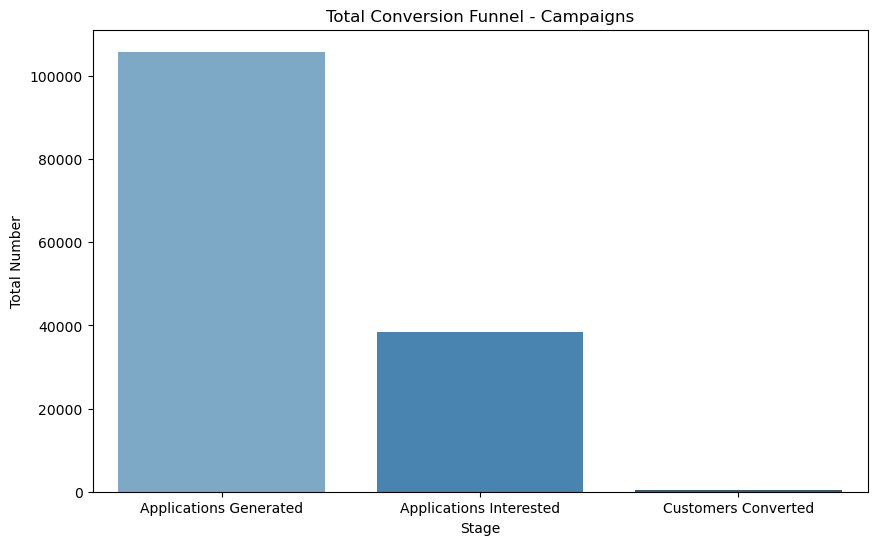

In [37]:
# Calculate total numbers for the funnel stages
total_generated = df_campaigns['Applications generated'].sum()
total_interested = df_campaigns['Applications interested'].sum()
total_converted = df_campaigns['Customers converted'].sum()

# Prepare data for the funnel plot
funnel_data_campaigns = {
    'Stage': ['Applications Generated', 'Applications Interested', 'Customers Converted'],
    'Total Number': [total_generated, total_interested, total_converted]
}

funnel_df_campaigns = pd.DataFrame(funnel_data_campaigns)

# Plot the funnel
plt.figure(figsize=(10, 6))
sns.barplot(x='Stage', y='Total Number', data=funnel_df_campaigns, palette='Blues_d')
plt.title('Total Conversion Funnel - Campaigns')
plt.show()


### Advisers Funnel

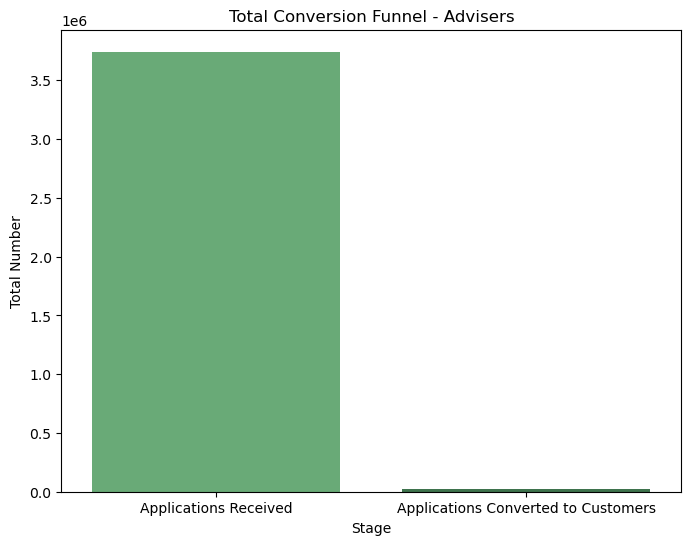

In [38]:
# Calculate total numbers for the advisers
total_received = df_advisers['Applications received'].sum()
total_converted_advisers = df_advisers['Applications converted to customers'].sum()

# Prepare data for the funnel plot
funnel_data_advisers = {
    'Stage': ['Applications Received', 'Applications Converted to Customers'],
    'Total Number': [total_received, total_converted_advisers]
}

funnel_df_advisers = pd.DataFrame(funnel_data_advisers)

# Plot the funnel
plt.figure(figsize=(8, 6))
sns.barplot(x='Stage', y='Total Number', data=funnel_df_advisers, palette='Greens_d')
plt.title('Total Conversion Funnel - Advisers')
plt.show()

### What We Learn

- For the **campaigns funnel**, there is a significant drop-off at each stage of the funnel. From the **105,832** applications generated, only a fraction show interest, and an even smaller number—**437**—end up converting into customers. This indicates a high attrition rate throughout the customer journey. The drastic reduction from interested customers to conversions highlights potential inefficiencies in either the targeting, messaging, or follow-up processes of the campaigns.

- For the **advisers funnel**, a much larger volume of **3,743,419** applications were received, out of which **19,601** were successfully converted to customers. The drop-off between applications received and customers converted is notable, suggesting that although advisers are handling a high volume of leads, they are not converting them efficiently into customers. This inefficiency might be due to the quality of the leads or the capacity of advisers to effectively manage their workload.

- Comparing the two funnels, it appears that while campaigns generate a smaller number of applications, they do lead to conversions. On the other hand, advisers handle a significant number of applications from various sources, but the overall conversion rate is low. This suggests an opportunity to enhance both lead quality and adviser support systems to boost conversion efficiency.

Overall, the insights from the funnels indicate opportunities to reduce drop-offs in the conversion process, improve targeting and follow-up for campaigns, and better manage adviser workload to optimize customer conversion.

# 5. Revenue and ROI Calculations

### Campaigns Data

In [51]:
# Total Revenue
df_campaigns['Total Revenue'] = df_campaigns['Customers converted'] * df_campaigns['Average value of Customers']

# Profit
df_campaigns['Profit'] = df_campaigns['Total Revenue'] - df_campaigns['Marketing Spend']

# Return on Investment (ROI)
df_campaigns['ROI'] = (df_campaigns['Profit'] / df_campaigns['Marketing Spend']) * 100

# Cost per Acquisition (CPA)
df_campaigns['CPA'] = df_campaigns['Marketing Spend'] / df_campaigns['Customers converted']
df_campaigns['CPA'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_campaigns['CPA'].fillna(0, inplace=True)

# 6. Campaign and Adviser Performance Segmentation

## 6.1 Identify Top Performers
### Top 10 Campaigns by ROI

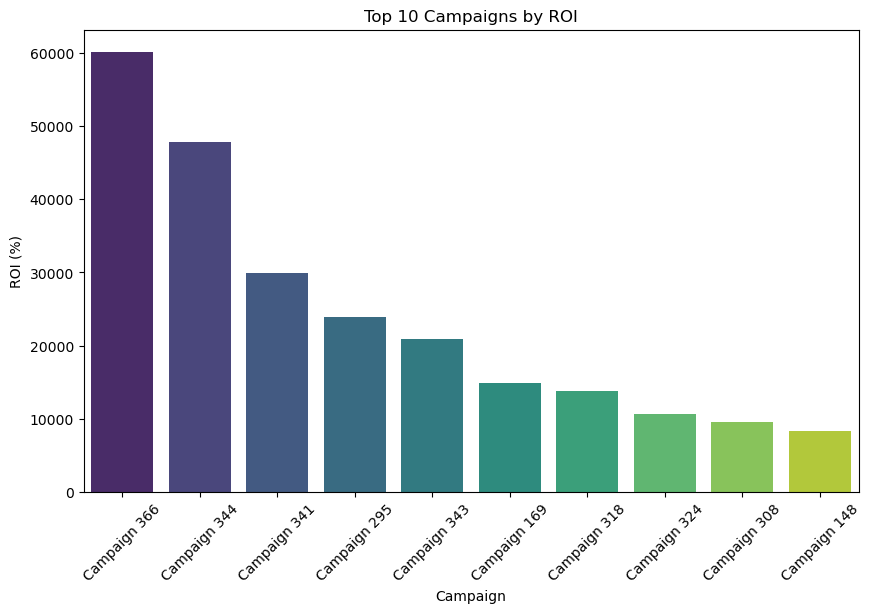

In [52]:
top_roi = df_campaigns.sort_values(by='ROI', ascending=False).head(10)

# Plotting the bar chart for top 10 campaigns by ROI
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign', y='ROI', data=top_roi, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Campaigns by ROI')
plt.ylabel('ROI (%)')
plt.show()


### Top Advisers by Conversion Rate

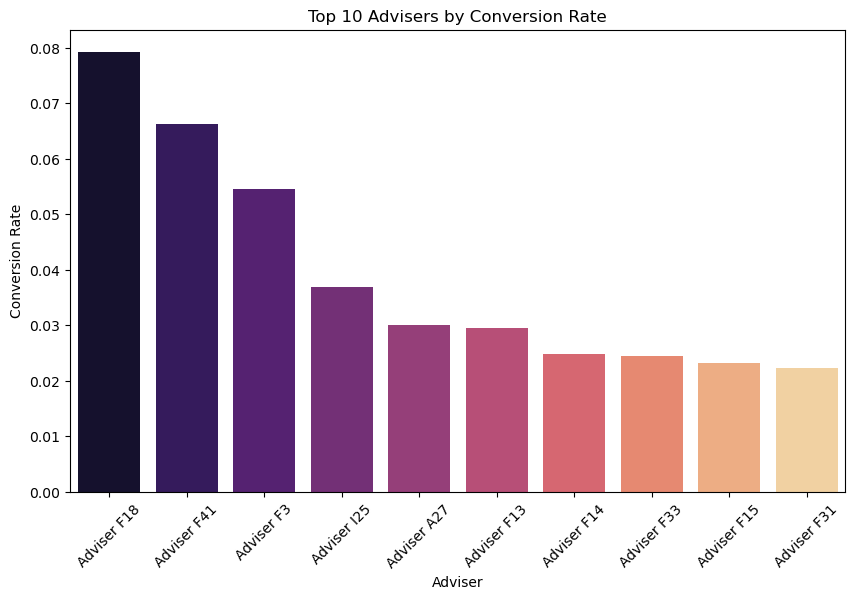

In [41]:
top_advisers = df_advisers.sort_values(by='Adviser Conversion Rate', ascending=False).head(10)

# Plotting the bar chart for top 10 advisers by conversion rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Adviser', y='Adviser Conversion Rate', data=top_advisers, palette='magma')
plt.xticks(rotation=45)
plt.title('Top 10 Advisers by Conversion Rate')
plt.ylabel('Conversion Rate')
plt.show()

### Top 10 Campaigns by Conversion Rate

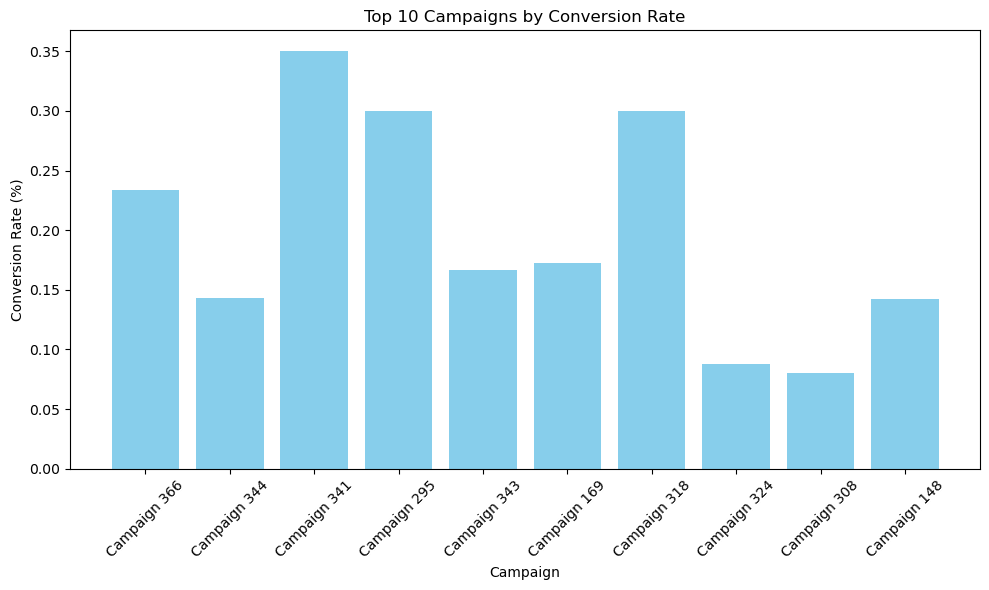

In [47]:
top_conversion = df_campaigns.sort_values(by='Conversion Rate', ascending=False).head(10)
# Plotting the bar chart for top 10 campaigns by Conversion Rate
plt.figure(figsize=(10, 6))
plt.bar(top_roi['Campaign'], top_roi['Conversion Rate'], color='skyblue')
plt.xlabel('Campaign')
plt.ylabel('Conversion Rate (%)')
plt.title('Top 10 Campaigns by Conversion Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 10 Campaigns by Lowest CPA

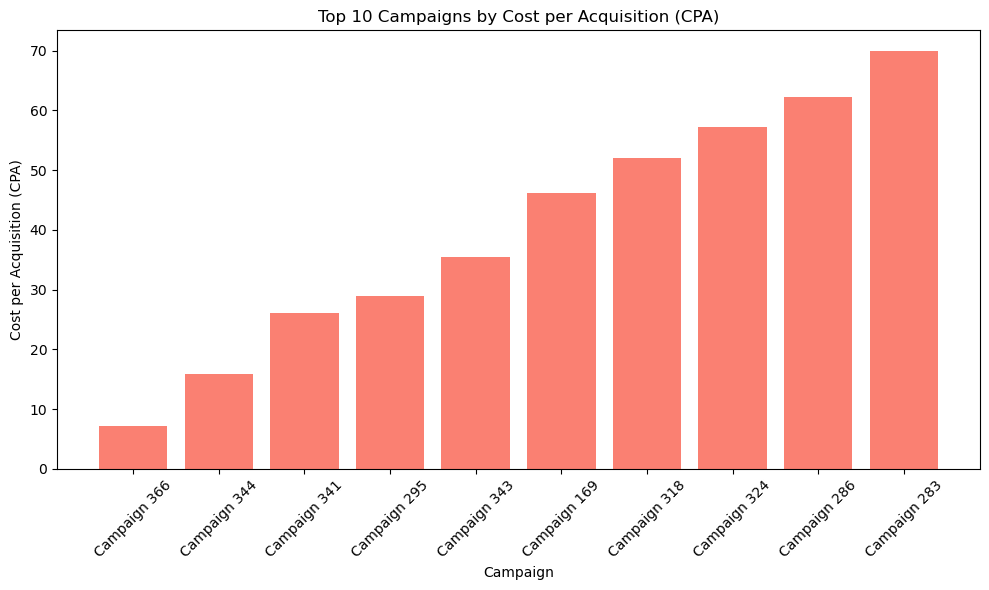

In [48]:
# Exclude campaigns with zero customers converted to avoid division by zero in CPA
df_cpa = df_campaigns[df_campaigns['Customers converted'] > 0]
top_cpa = df_cpa.sort_values(by='CPA').head(10)

# Plotting the bar chart for top 10 campaigns by CPA
plt.figure(figsize=(10, 6))
plt.bar(top_cpa['Campaign'], top_cpa['CPA'], color='salmon')
plt.xlabel('Campaign')
plt.ylabel('Cost per Acquisition (CPA)')
plt.title('Top 10 Campaigns by Cost per Acquisition (CPA)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### What We Learn

The analysis of campaign and adviser performance segmentation reveals several key insights:

- **Top 10 Campaigns by ROI**:
  Campaign 366 significantly outperforms others in terms of Return on Investment (ROI), with an ROI close to 60,000%. This suggests that Campaign 366 is exceptionally efficient at generating value from the marketing spend. Other campaigns, such as Campaign 344 and Campaign 341, also perform well but show a considerable gap compared to Campaign 366. Focusing on the factors contributing to Campaign 366's success may help replicate this high ROI across other campaigns.

- **Top 10 Advisers by Conversion Rate**:
  Adviser F18 demonstrates the highest conversion rate, around 8%, which is significantly better than other advisers. Advisers F41 and F3 also perform well, though with slightly lower rates. The difference in conversion rates suggests varying levels of effectiveness among advisers. It would be beneficial to analyze Adviser F18's methods and potentially train other advisers based on those practices to enhance overall performance.

- **Top 10 Campaigns by Conversion Rate**:
  Campaign 341 has the highest conversion rate among the top 10 campaigns, with a rate of around 35%. This indicates that this campaign is effective at converting leads into customers compared to others. There is, however, a considerable range in conversion rates among the top campaigns, which may point to differences in targeting, messaging, or audience suitability. Identifying the factors behind Campaign 341's success could help in designing more impactful campaigns.

- **Top 10 Campaigns by Lowest CPA (Cost Per Acquisition)**:
  Campaign 366 has the lowest Cost Per Acquisition, which suggests it is the most cost-efficient in acquiring new customers. Campaign 344 and Campaign 341 also exhibit relatively low CPA, meaning they effectively use the marketing budget to gain new customers at a lower cost. This is consistent with their high ROI, showing they are efficient in both value generation and budget utilization.

**Overall Insights**:
Campaign 366 emerges as a top performer across multiple metrics—high ROI, high conversion rate, and low CPA—indicating a highly successful campaign that maximizes both budget efficiency and lead conversion. On the adviser side, Adviser F18 leads in conversion rate, suggesting best practices that could potentially be implemented across other advisers.

To improve overall performance, future efforts should focus on:
- Understanding and replicating the factors behind Campaign 366's and Adviser F18's success.
- Providing targeted training to advisers to improve conversion rates.
- Optimizing underperforming campaigns by analyzing high-performing ones for insights on better targeting, messaging, and budget allocation.

## 6.2 Cluster Analysis
### Campaigns Clustering

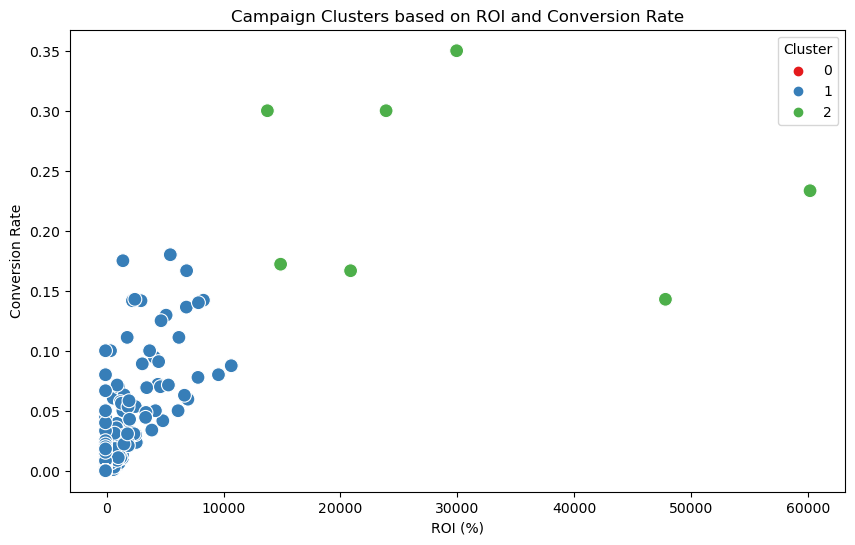

In [54]:
# Prepare features for clustering
cluster_features = df_campaigns[['ROI', 'Conversion Rate', 'CPA']]

# Handle infinite and NaN values
cluster_features = cluster_features.replace([np.inf, -np.inf], np.nan).fillna(0)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df_campaigns['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_campaigns, x='ROI', y='Conversion Rate', hue='Cluster', palette='Set1', s=100)
plt.title('Campaign Clusters based on ROI and Conversion Rate')
plt.xlabel('ROI (%)')
plt.ylabel('Conversion Rate')
plt.legend(title='Cluster')
plt.show()

### Advisers Clustering

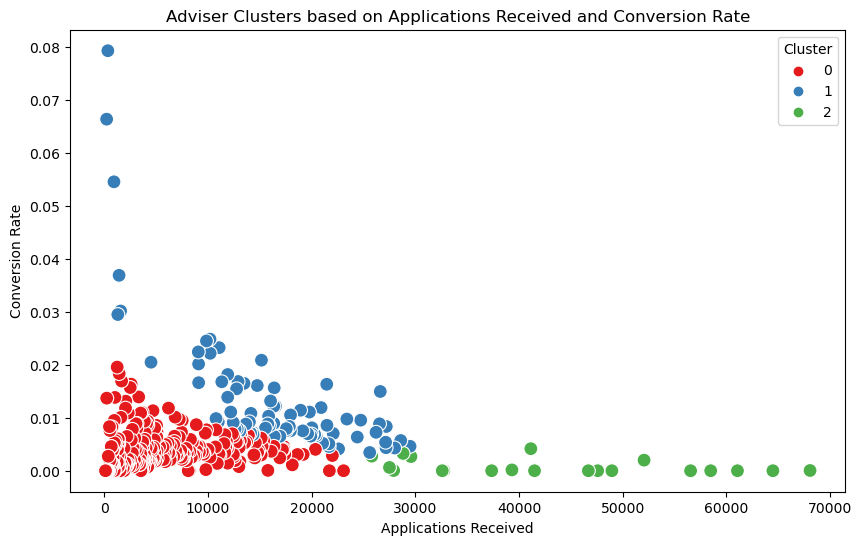

In [56]:
# Prepare features for clustering advisers
cluster_features_advisers = df_advisers[['Applications received', 'Applications converted to customers', 'Adviser Conversion Rate']]

# Handle infinite and NaN values
cluster_features_advisers = cluster_features_advisers.replace([np.inf, -np.inf], np.nan).fillna(0)

# Standardize the features
scaler_advisers = StandardScaler()
scaled_features_advisers = scaler_advisers.fit_transform(cluster_features_advisers)

# Apply K-Means Clustering
kmeans_advisers = KMeans(n_clusters=3, n_init=10, random_state=42)
df_advisers['Cluster'] = kmeans_advisers.fit_predict(scaled_features_advisers)

# Visualize Adviser Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_advisers, x='Applications received', y='Adviser Conversion Rate', hue='Cluster', palette='Set1', s=100)
plt.title('Adviser Clusters based on Applications Received and Conversion Rate')
plt.xlabel('Applications Received')
plt.ylabel('Conversion Rate')
plt.legend(title='Cluster')
plt.show()


### What We Learn

The clustering analysis for campaigns and advisers reveals several insights regarding segmentation and performance patterns:

- **Campaign Clusters Based on ROI and Conversion Rate**:
  - The scatterplot shows three distinct clusters (Cluster 0, Cluster 1, and Cluster 2) based on Return on Investment (ROI) and Conversion Rate.
  - **Cluster 1 (blue)** represents the majority of campaigns, with low to moderate ROI and conversion rates. Most campaigns fall within this cluster, indicating consistent but not exceptional performance.
  - **Cluster 2 (green)** comprises campaigns with extremely high ROI values, suggesting outliers that are highly successful. However, these campaigns have relatively lower conversion rates. These campaigns are highly efficient in generating profit relative to marketing spend but may have room for improvement in actual customer conversion.
  - **Cluster 0 (red)** is positioned near the lower end of ROI and conversion rates, indicating the poorest-performing campaigns. These campaigns might require intervention, such as retargeting or revising messaging, to boost their performance.
  - The overall distribution highlights that while a few campaigns are extremely successful in terms of ROI, they might not necessarily be as successful in converting leads.

- **Adviser Clusters Based on Applications Received and Conversion Rate**:
  - The adviser clustering also reveals three clusters, represented by **Cluster 0 (red)**, **Cluster 1 (blue)**, and **Cluster 2 (green)**.
  - **Cluster 0 (red)** represents advisers with a lower number of applications received but a higher conversion rate. This suggests that these advisers are more effective at converting leads when managing fewer applications.
  - **Cluster 1 (blue)** includes advisers who have a moderate number of applications received and moderate conversion rates. These advisers might benefit from targeted training to improve their conversion effectiveness.
  - **Cluster 2 (green)** represents advisers with the highest number of applications received but the lowest conversion rates. This likely indicates a capacity issue where advisers are overwhelmed by the workload, leading to reduced attention per application and ultimately lower conversion rates.
  
**Overall Insights**:
- **Campaign Performance**: There is a small set of campaigns (Cluster 2) with extremely high ROI but relatively lower conversion rates. Focusing on optimizing conversion efforts for these high-ROI campaigns could lead to even better outcomes.
- **Adviser Efficiency**: Advisers in Cluster 2 who handle the highest number of applications have the lowest conversion rates, suggesting that load balancing may help improve overall conversion efficiency. Advisers in Cluster 0 show the highest effectiveness, implying that a reduced workload correlates positively with higher conversion rates.

To improve overall efficiency:
- **Campaign Optimization**: Focus on campaigns in Cluster 2 to improve their conversion rates while maintaining high ROI.
- **Adviser Training and Lead Allocation**: Investigate the practices of high-performing advisers in Cluster 0 and consider redistributing leads to alleviate pressure on advisers in Cluster 2 to enhance their conversion rates.


## 7: Predictive Modeling

### 7.1 Prepare data

Since we cannot directly link campaigns and advisers, we will attempt to include aggregated adviser performance into the campaign data.

In [58]:
average_adviser_conversion_rate = df_advisers['Adviser Conversion Rate'].mean()
print(f"Average Adviser Conversion Rate: {average_adviser_conversion_rate}")

Average Adviser Conversion Rate: 0.006025195198688334


### Add Estimated Adviser Conversions to Campaign Data
We will create a new feature in the campaign data based on the average adviser conversion rate.

In [60]:
df_campaigns['Estimated Adviser Conversions'] = df_campaigns['Applications interested'] * average_adviser_conversion_rate

# Handle any NaN values
df_campaigns['Estimated Adviser Conversions'].fillna(0, inplace=True)


### 7.2 Build and Evaluate Models

### Linear Regression Model

Linear Regression is a statistical method and one of the simplest machine learning algorithms for modeling the relationship between a dependent variable (target) and one or more independent variables (features). The goal is to find a linear equation that best predicts the target variable based on the input features.

Linear Regression Model Performance:
R-squared: 0.3688799271444436
RMSE: 2.1216385844587293


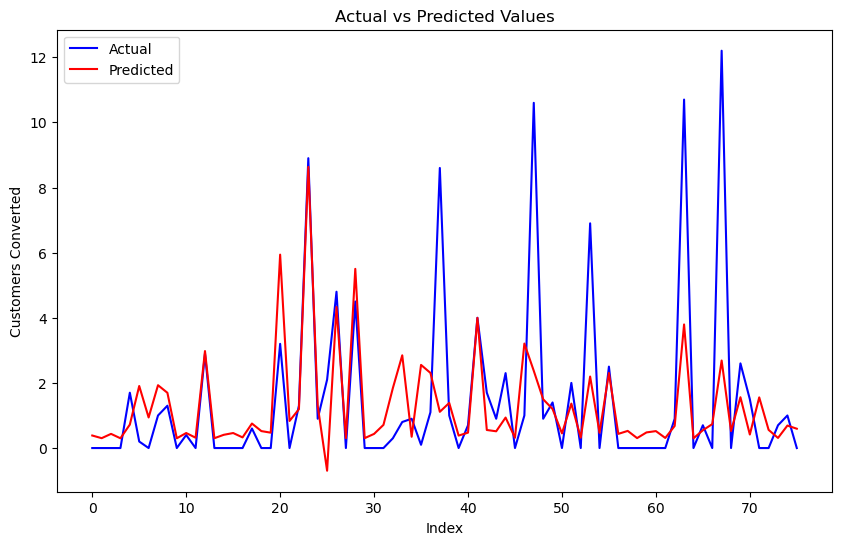

In [63]:
X = df_campaigns[['Applications generated', 'Applications interested', 'Marketing Spend', 'Estimated Adviser Conversions']]
y = df_campaigns['Customers converted']

# Replace NaN values in y
y.fillna(0, inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
lg_regressor = LinearRegression()
lg_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = lg_regressor.predict(X_test)

# Evaluate the model
print('Linear Regression Model Performance:')
print('R-squared:', metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Visualize Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_test)), y=y_test, label='Actual', color='blue')
sns.lineplot(x=range(len(y_pred)), y=y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Customers Converted')
plt.legend()
plt.show()



### Findings: Linear Regression Model Performance

The performance of the linear regression model used to predict the number of customers converted reveals the following insights:

- **R-squared (R²)**: The model has an R-squared value of **0.3689**, which means that approximately **36.89%** of the variability in the number of customers converted can be explained by the features used in the model. This relatively low value suggests that the linear regression model does not capture the relationship between the input features and the target variable very well, indicating that there are other factors affecting customer conversion that are not included in the model.

- **Root Mean Squared Error (RMSE)**: The RMSE value of **2.12** indicates the average deviation between the predicted and actual values of the number of customers converted. A lower RMSE value is generally preferred, but here, the value suggests that there is a significant error in the model's predictions.

- **Actual vs Predicted Plot**:
  - The line plot comparing actual and predicted values shows that the model has difficulty accurately predicting peaks and high variability in customer conversion. In most cases, the predicted values (red line) do not align closely with the actual values (blue line), especially during spikes in conversion.
  - The model tends to underpredict during periods of high conversions and does not capture the variations effectively, suggesting that a simple linear relationship may not be sufficient for accurately modeling customer conversions.

**Overall Insights**:
- **Model Limitations**: The low R-squared and high RMSE values imply that the linear regression model may be inadequate for predicting customer conversions accurately in this context. The linear model may not be capturing the complexity of the relationships among the features.
- **Need for Improvement**: To improve prediction accuracy, it may be beneficial to:
  - **Incorporate additional features** that could explain more of the variance in customer conversions.
  - **Explore non-linear models** such as decision trees, random forests, or even ensemble methods that might be better suited for capturing complex relationships.
  - **Feature Engineering**: Transforming some variables, adding interaction terms, or using domain knowledge to create new features could potentially improve model performance.

These findings highlight the need to explore more advanced modeling techniques and incorporate additional data to better predict customer conversion outcomes.


### Random Forest Regressor Model

RandomForestRegressor and Linear Regression are both powerful tools, but they are suited for different scenarios. RandomForestRegressor excels when the data is complex, with non-linear relationships and feature interactions, as it leverages an ensemble of decision trees to capture patterns that Linear Regression cannot. It is robust to noise, handles missing data well, and provides feature importance insights, making it ideal for large datasets with many variables. On the other hand, Linear Regression is simpler, faster, and easier to interpret, making it a great choice when the data has a clear linear trend and interpretability is critical. While RandomForest offers superior predictive performance in complex cases, Linear Regression is often used as a baseline or in situations where transparency and computational efficiency are priorities.

RandomForestRegressor Model Performance:
R-squared: 0.4901913118058234
RMSE: 1.9068609479290408


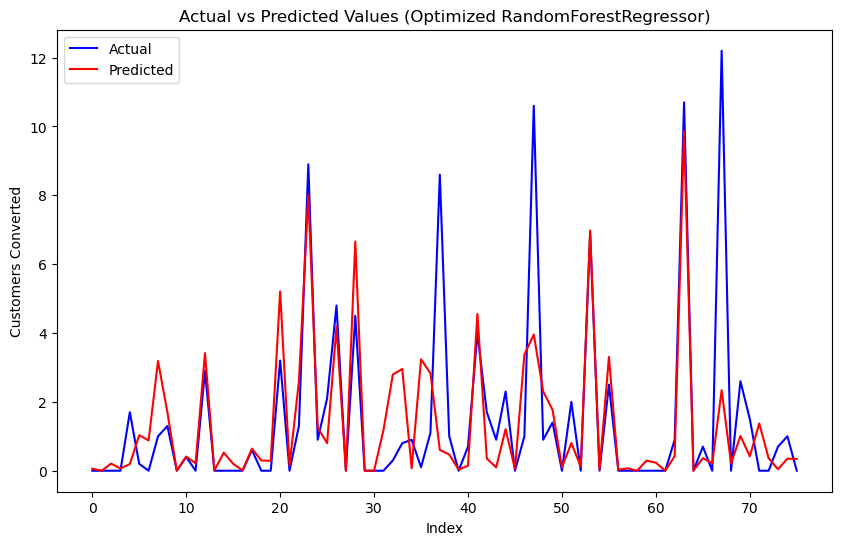

In [64]:
# Create and train the model
rf_regressor = RandomForestRegressor(n_estimators=500, max_depth=250, random_state=4921, n_jobs=10)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the RandomForestRegressor model
r_squared = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('RandomForestRegressor Model Performance:')
print('R-squared:', r_squared)
print('RMSE:', rmse)



# Visualize Actual vs Predicted values for RandomForestRegressor
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_test)), y=y_test, label='Actual', color='blue')
sns.lineplot(x=range(len(y_pred)), y=y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Values (Optimized RandomForestRegressor)')
plt.xlabel('Index')
plt.ylabel('Customers Converted')
plt.legend()
plt.show()

Attempt to improve model performance

### Findings: RandomForest Regressor Model Performance

The performance of the RandomForestRegressor model used to predict the number of customers converted reveals the following insights:

- **R-squared (R²)**: The model has an R-squared value of **0.4941**, which means that approximately **49.41%** of the variability in the number of customers converted can be explained by the features used in the model. This is a notable improvement compared to the linear regression model, which had an R-squared of **0.3689**. However, the R-squared value is still moderate, suggesting that the model has room for improvement in its predictive accuracy.

- **Root Mean Squared Error (RMSE)**: The RMSE value of **1.97** is slightly lower than that of the linear regression model (**2.12**), indicating better accuracy in the predictions. The lower RMSE signifies that the RandomForestRegressor model makes smaller errors on average compared to the linear model.

- **Actual vs Predicted Plot**:
  - The line plot comparing actual and predicted values shows that the RandomForestRegressor model captures peaks in customer conversions more accurately than the linear regression model, particularly around higher values.
  - While there is still a discrepancy between the predicted and actual values, especially during extreme peaks, the predictions made by the RandomForestRegressor model tend to be closer to the actual outcomes compared to the linear regression model.

**Overall Insights**:
- **Model Improvements**: Compared to the linear regression model, the RandomForestRegressor provides a better fit to the data, as evidenced by a higher R-squared and lower RMSE. This suggests that RandomForest, as a non-linear model, is better suited to capturing the complexities of the relationships among the features.
- **Limitations and Further Steps**:
  - Despite the improvements, the model's R-squared value is still below **0.50**, indicating that less than half of the variance in customer conversions is explained by the model. This points to missing features or data complexity that is not adequately captured.
  - The dataset might not be adequate or may be limited to train the model effectively, which can affect the accuracy and reliability of the model's predictions.
  - To further improve the model's performance, additional features could be included, such as time-based metrics, customer engagement indicators, or marketing channel-specific data.
  - Other advanced models, such as Gradient Boosting Machines (GBM) or XGBoost, could be explored to potentially increase predictive power.
  
The RandomForestRegressor outperforms the linear regression model and provides a more reliable prediction of customer conversions, but additional steps are needed to further enhance model accuracy and provide better insights into the drivers of customer conversion.


## 8: Recommendations



### For Campaign Owners:

### 8.1 Optimize Marketing Spend Allocation
- The correlation analysis revealed a positive link between marketing spend and customer conversions, though some campaigns showed significantly higher ROI than others.
- **Recommendation**: Reallocate marketing budgets away from low-ROI campaigns towards campaigns with higher proven returns to increase overall marketing efficiency.

### 8.2 Enhance Campaign-Adviser Integration
- There is a notable gap between applications generated and those followed up by advisers, which can lead to lost opportunities.
- **Recommendation**: Improve the integration between marketing campaigns and adviser teams by ensuring a seamless lead-handling process. Implement better tracking and communication systems so that advisers have clear visibility on each campaign's generated leads and can act accordingly.

### 8.3 Data Collection Improvements
- Current dataset limitations may have impacted the model's ability to accurately predict customer conversions.
- **Recommendation**: Collect additional data points that could better reflect customer behavior, such as engagement metrics, marketing channel details, and customer interaction data. This will help improve future analysis and campaign targeting.

### 8.4 Experiment with Targeted Campaigns
- Certain campaigns showed higher conversion rates despite a lower volume of applications generated, suggesting a more targeted approach may be effective.
- **Recommendation**: Conduct A/B testing to explore which segments respond best to targeted campaigns and fine-tune the approach to increase conversion rates across different customer segments.

### 8.5 Optimize Cost per Acquisition (CPA)
- CPA analysis revealed variability across campaigns, highlighting opportunities to optimize.
- **Recommendation**: Investigate campaigns with a lower CPA to identify successful strategies that can be replicated. Aim to optimize campaign settings and budget allocation to achieve a consistently lower CPA.


### 8.6 Campaign Retargeting and Re-engagement
- There was a significant drop-off observed in the conversion funnel between initial interest and final conversions.
- **Recommendation**: Implement retargeting campaigns for customers who showed interest but did not complete the conversion. Use personalized messaging to re-engage them and nudge them further along the funnel.


### For Advisers:

### 8.7. Improve Adviser Training and Support
- Adviser performance varied significantly, with clusters of advisers having lower conversion rates.
- **Recommendation**: Participate in training programs designed to enhance key skills, focusing on best practices from high-performing advisers. This training should include handling leads effectively, improving customer communication, and understanding different lead types.

### 8.8 Utilize Lead Prioritization System
- The analysis highlighted differences in conversion rates across various leads, which means focusing on high-potential leads can maximize efforts.
- **Recommendation**: Work with lead scoring systems to prioritize leads more likely to convert. This way, advisers can dedicate more time to leads with the highest potential, improving overall conversion rates.

### 8.9 Engage More with Campaign Data
- Advisers may benefit from understanding the insights from marketing campaigns, such as customer engagement metrics and conversion statistics.
- **Recommendation**: Collaborate more closely with the marketing team to understand which campaigns are performing well and adjust follow-up strategies accordingly. This information will help advisers better approach leads generated from specific campaigns.

### 9.0 Continuous Feedback Loop
- To bridge the gap between campaign performance and adviser follow-up, a feedback loop between marketing and sales can help improve outcomes.
- **Recommendation**: Set up regular sessions with campaign owners to discuss lead quality, campaign-specific insights, and obstacles faced in converting leads. This ongoing communication will help refine both campaigns and the lead-handling process.